<a href="https://colab.research.google.com/github/Carsonn-Chen/BINF-5220/blob/main/Liu_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework2: Linear Regression

## import modules

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BINF 5220/data/hba1c_bloodGlucose_selected_use_train_test_0.5_seed_31.csv",index_col=0)
# print(df.head())

## split data into fitting and validation sets

In [ ]:
np.random.seed(31)

df_train, df_test = train_test_split(df, test_size=0.5)

## Fitting a Degree 3 Polynomial

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


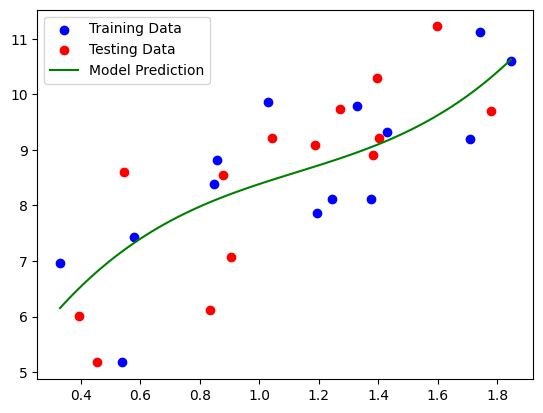

In [ ]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(df_train[['rbg_scaled']])
X_test_poly = poly_features.transform(df_test[['rbg_scaled']])

model = LinearRegression()
model.fit(X_train_poly, df_train['hba1c'])

X_plot = np.linspace(df_train['rbg_scaled'].min(), df_train['rbg_scaled'].max(), 100)
X_plot_poly = poly_features.transform(X_plot.reshape(-1, 1))
y_plot = model.predict(X_plot_poly)

plt.scatter(df_train['rbg_scaled'], df_train['hba1c'], color='blue', label='Training Data')
plt.scatter(df_test['rbg_scaled'], df_test['hba1c'], color='red', label='Testing Data')
plt.plot(X_plot, y_plot, color='green', label='Model Prediction')
plt.legend()
plt.show()


## Calculating R2 Score

In [ ]:
r2_train = model.score(X_train_poly, df_train['hba1c'])
r2_test = model.score(X_test_poly, df_test['hba1c'])

print(f"R2 Score for Training Data: {r2_train}")
print(f"R2 Score for Testing Data: {r2_test}")

R2 Score for Training Data: 0.6237055025260223
R2 Score for Testing Data: 0.6012152949575463


I think the model is neither significantly overfitting nor underfitting. The two scores are close to each other for both datasets. It means that the model generalizes well to unseen data. And from the plot, the model captures the trend of both dataset. Both points from two data scattered around the curve. This shows it isn't overfitted.

## Fitting a Degree 10 Polynomial

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


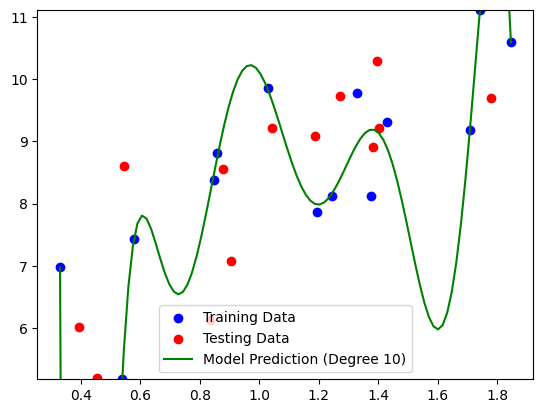

R2 Score for Training Data (Degree 10): 0.935141183766417
R2 Score for Testing Data (Degree 10): -22.39192482729845


In [ ]:
poly_features_10 = PolynomialFeatures(degree=10)
X_train_poly_10 = poly_features_10.fit_transform(df_train[['rbg_scaled']])
X_test_poly_10 = poly_features_10.transform(df_test[['rbg_scaled']])

model_10 = LinearRegression()
model_10.fit(X_train_poly_10, df_train['hba1c'])


X_plot_poly_10 = poly_features_10.transform(X_plot.reshape(-1, 1))
y_plot_10 = model_10.predict(X_plot_poly_10)

plt.scatter(df_train['rbg_scaled'], df_train['hba1c'], color='blue', label='Training Data')
plt.scatter(df_test['rbg_scaled'], df_test['hba1c'], color='red', label='Testing Data')
plt.plot(X_plot, y_plot_10, color='green', label='Model Prediction (Degree 10)')
plt.ylim([df_train['hba1c'].min(), df_train['hba1c'].max()])
plt.legend()
plt.show()


r2_train_10 = model_10.score(X_train_poly_10, df_train['hba1c'])
r2_test_10 = model_10.score(X_test_poly_10, df_test['hba1c'])

print(f"R2 Score for Training Data (Degree 10): {r2_train_10}")
print(f"R2 Score for Testing Data (Degree 10): {r2_test_10}")

I think this model is overfitted. The score of training data is very high while the score of testing data is negative. This means the model is fitting the noise in the training data but not the trend. The plot also shows this. The curve goes through most of the training data points but none of the testing data.

# Homework3

## Ridge Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


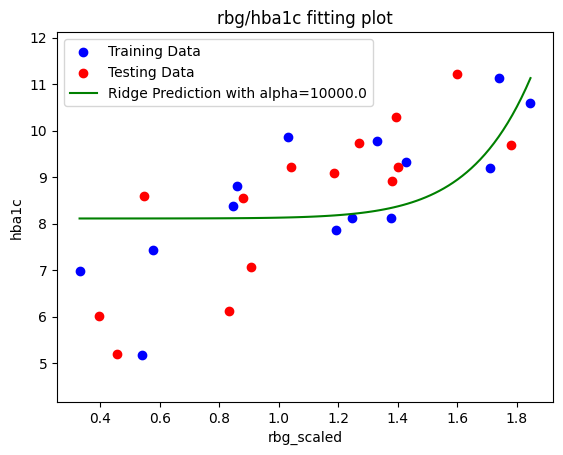

R2 Score for Training Data: 0.3829533678449407
R2 Score for Testing Data: 0.1735770185965717


In [ ]:
from sklearn.linear_model import Ridge

def plot_ridge_model(alpha_value):

  poly_features = PolynomialFeatures(degree=10)
  X_train_poly = poly_features.fit_transform(df_train[['rbg_scaled']])
  X_test_poly = poly_features.transform(df_test[['rbg_scaled']])

  # alpha_value = 1e-3
  ridge_model = Ridge(alpha=alpha_value)

  ridge_model.fit(X_train_poly, df_train['hba1c'])

  X_plot = np.linspace(df_train['rbg_scaled'].min(), df_train['rbg_scaled'].max(), 100)
  X_plot_poly = poly_features.transform(X_plot.reshape(-1, 1))
  y_plot = ridge_model.predict(X_plot_poly)

  plt.scatter(df_train['rbg_scaled'], df_train['hba1c'], color='blue', label='Training Data')
  plt.scatter(df_test['rbg_scaled'], df_test['hba1c'], color='red', label='Testing Data')
  plt.plot(X_plot, y_plot, color='green', label=f'Ridge Prediction with alpha={alpha_value}')
  plt.xlabel('rbg_scaled')
  plt.ylabel('hba1c')
  plt.title('rbg/hba1c fitting plot')
  plt.ylim([df_train['hba1c'].min() - 1, df_train['hba1c'].max() + 1])
  plt.legend()
  plt.show()

  r2_train = ridge_model.score(X_train_poly, df_train['hba1c'])
  r2_test = ridge_model.score(X_test_poly, df_test['hba1c'])

  print(f"R2 Score for Training Data: {r2_train}")
  print(f"R2 Score for Testing Data: {r2_test}")


plot_ridge_model(1e4)

## three values of alpha

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


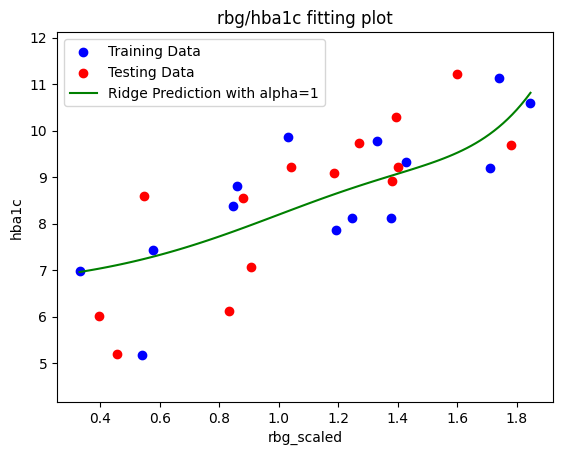

R2 Score for Training Data: 0.6047674586251
R2 Score for Testing Data: 0.5667199861522165


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


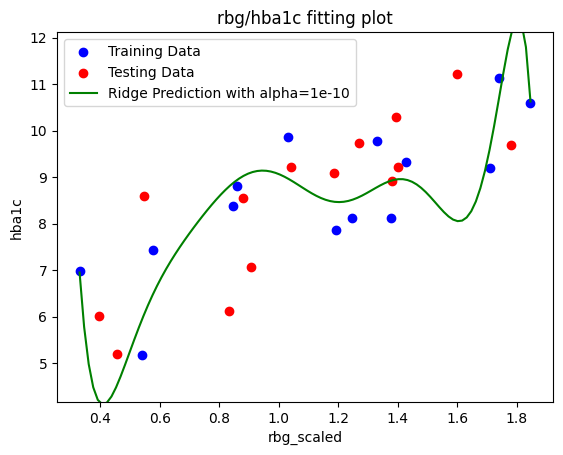

R2 Score for Training Data: 0.8365755232205636
R2 Score for Testing Data: -0.03057683348614515


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


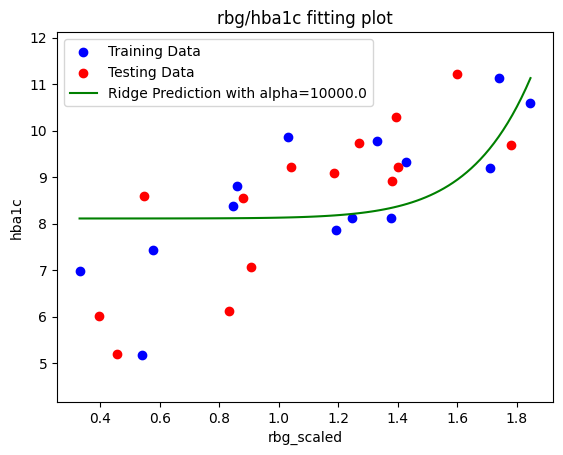

R2 Score for Training Data: 0.3829533678449407
R2 Score for Testing Data: 0.1735770185965717


In [ ]:
plot_ridge_model(1)
plot_ridge_model(1e-10)
plot_ridge_model(1e4)

When alpha value is 1, it is just right. As can be seen from the figure, the curve smoothly fits the data from the training and test sets, and each point is relatively similar in distance from the curve.

When alpha is 1e-10, it is too low. As can be seen from the figure, the curve goes through most of the training data points but none of the testing data, which means it is overfitted.

when alpha is 1e4, it is too high. As can be seen from the figure, the curve doesn't show the trend of the points. This means it is underfitted.